# K-means

Load data and standardize

In [52]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.datasets import fetch_openml
import umap
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import datasets, metrics
from sqlalchemy import create_engine
import warnings
warnings.filterwarnings("ignore")

In [84]:
df = pd.read_csv(r'/Users/alexanderheinz/Downloads/894_813759_bundle_archive/2019.csv')

In [85]:
# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

Next, we fit k-means with k values equal to 2, 3, 4, 5 and 6:

In [86]:
# Defining the k-means

cluster_numbers = [2, 3, 4, 5, 6]
kmeans_clusters = []
for i in cluster_numbers:
    k_means = KMeans(n_clusters=i, random_state=123)
    kmeans_clusters.append(k_means.fit_predict(X_std))

Next, we visualize each k-means solution:

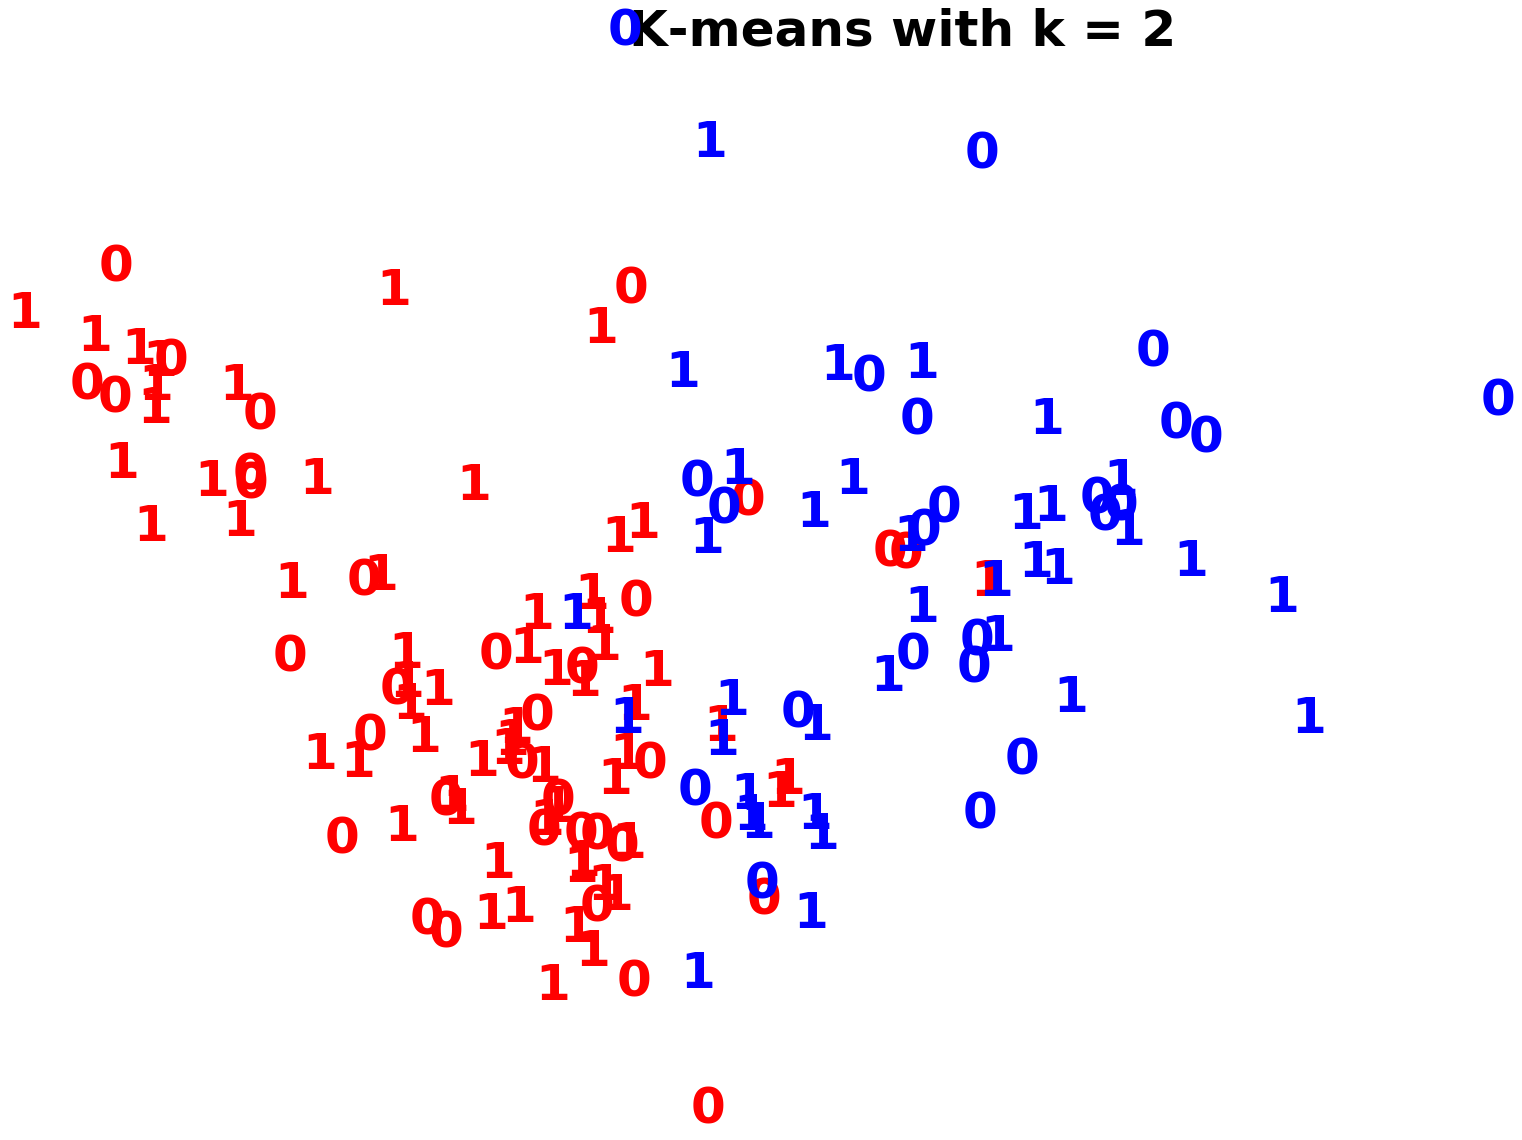

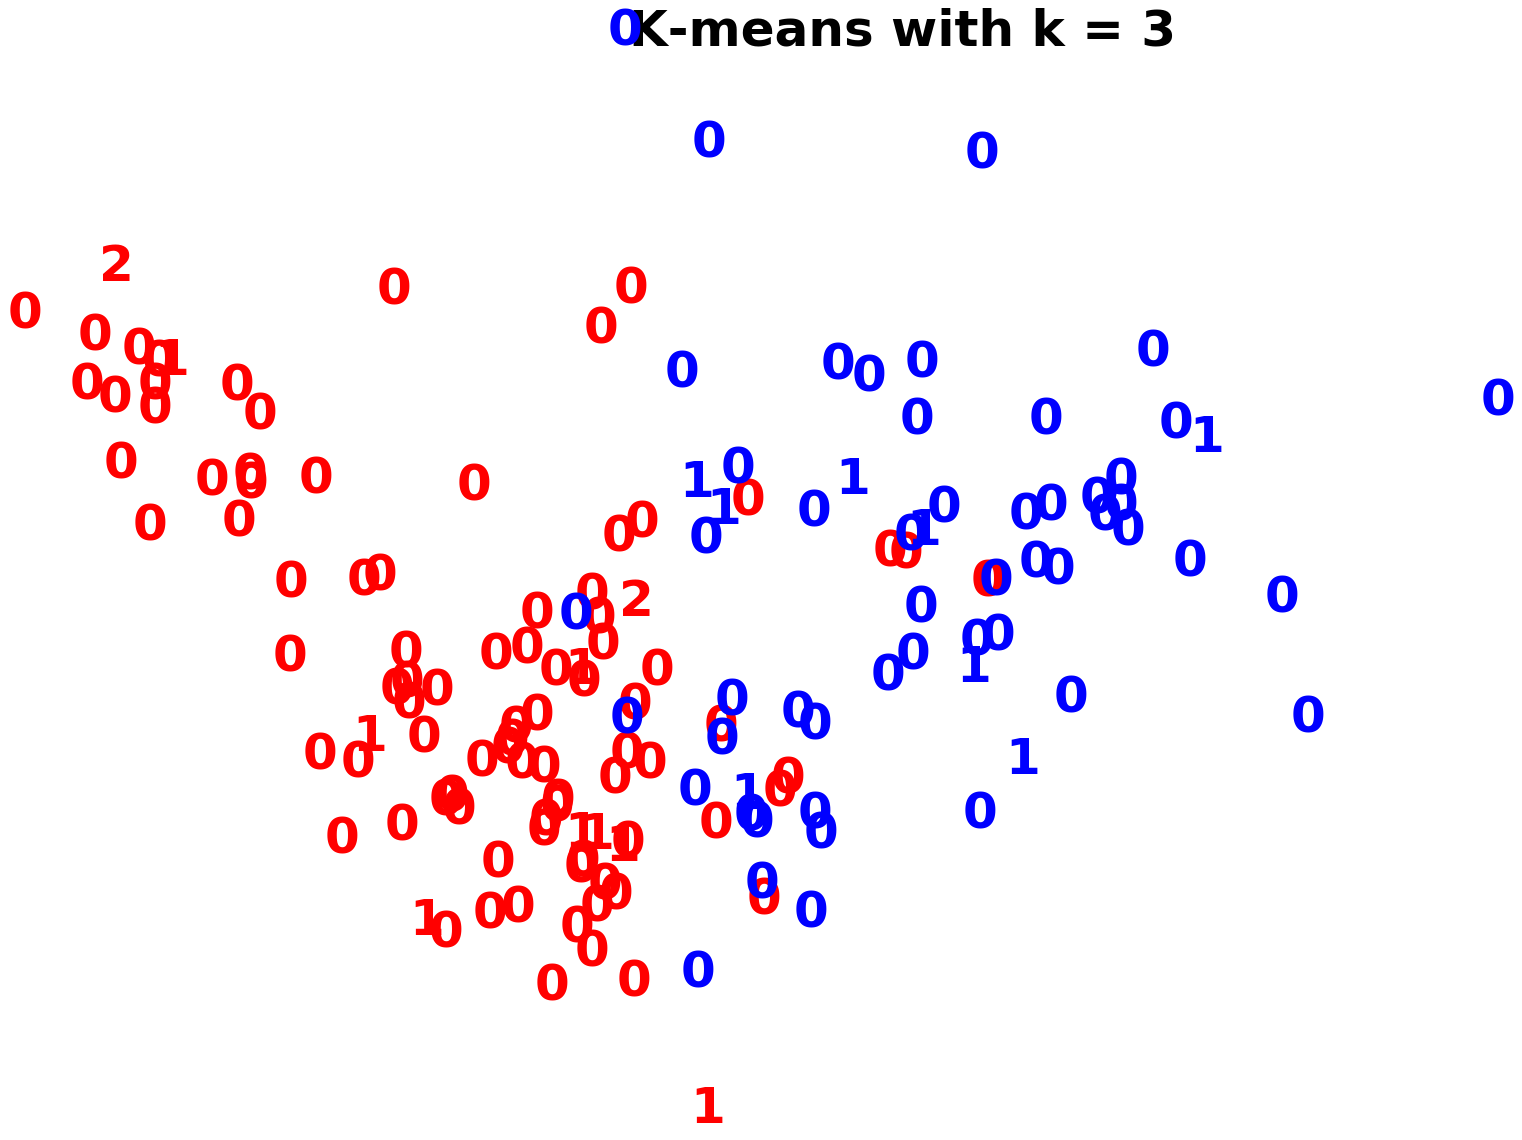

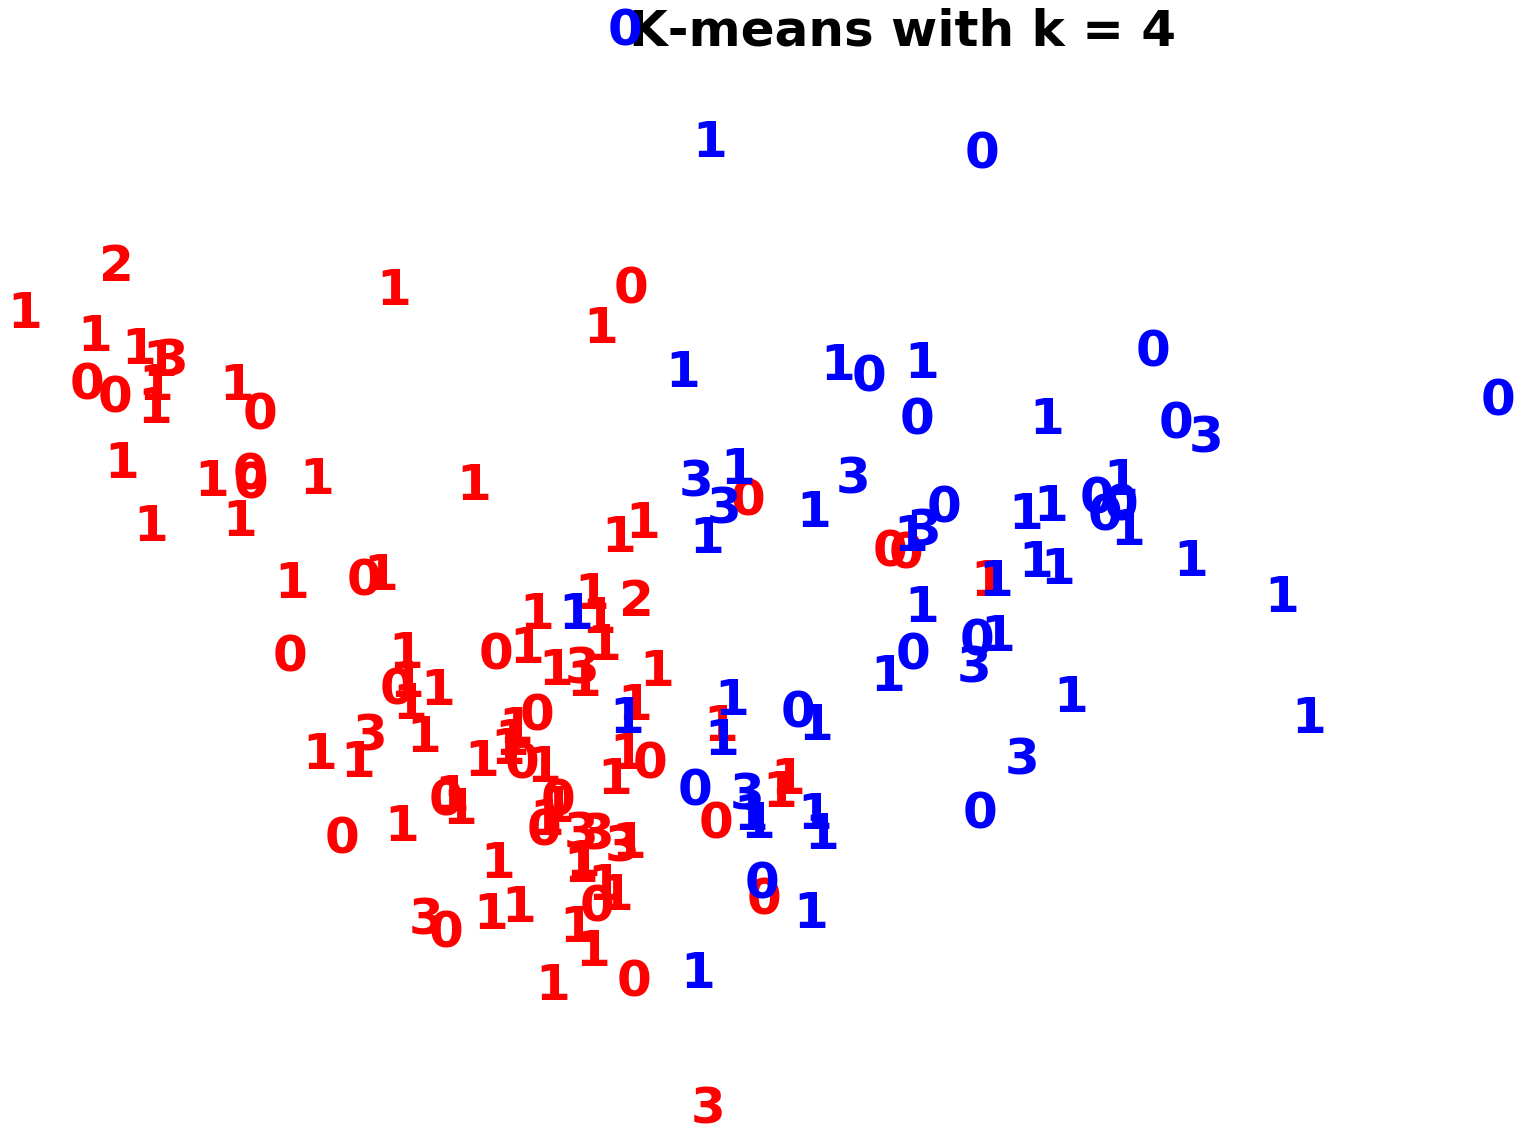

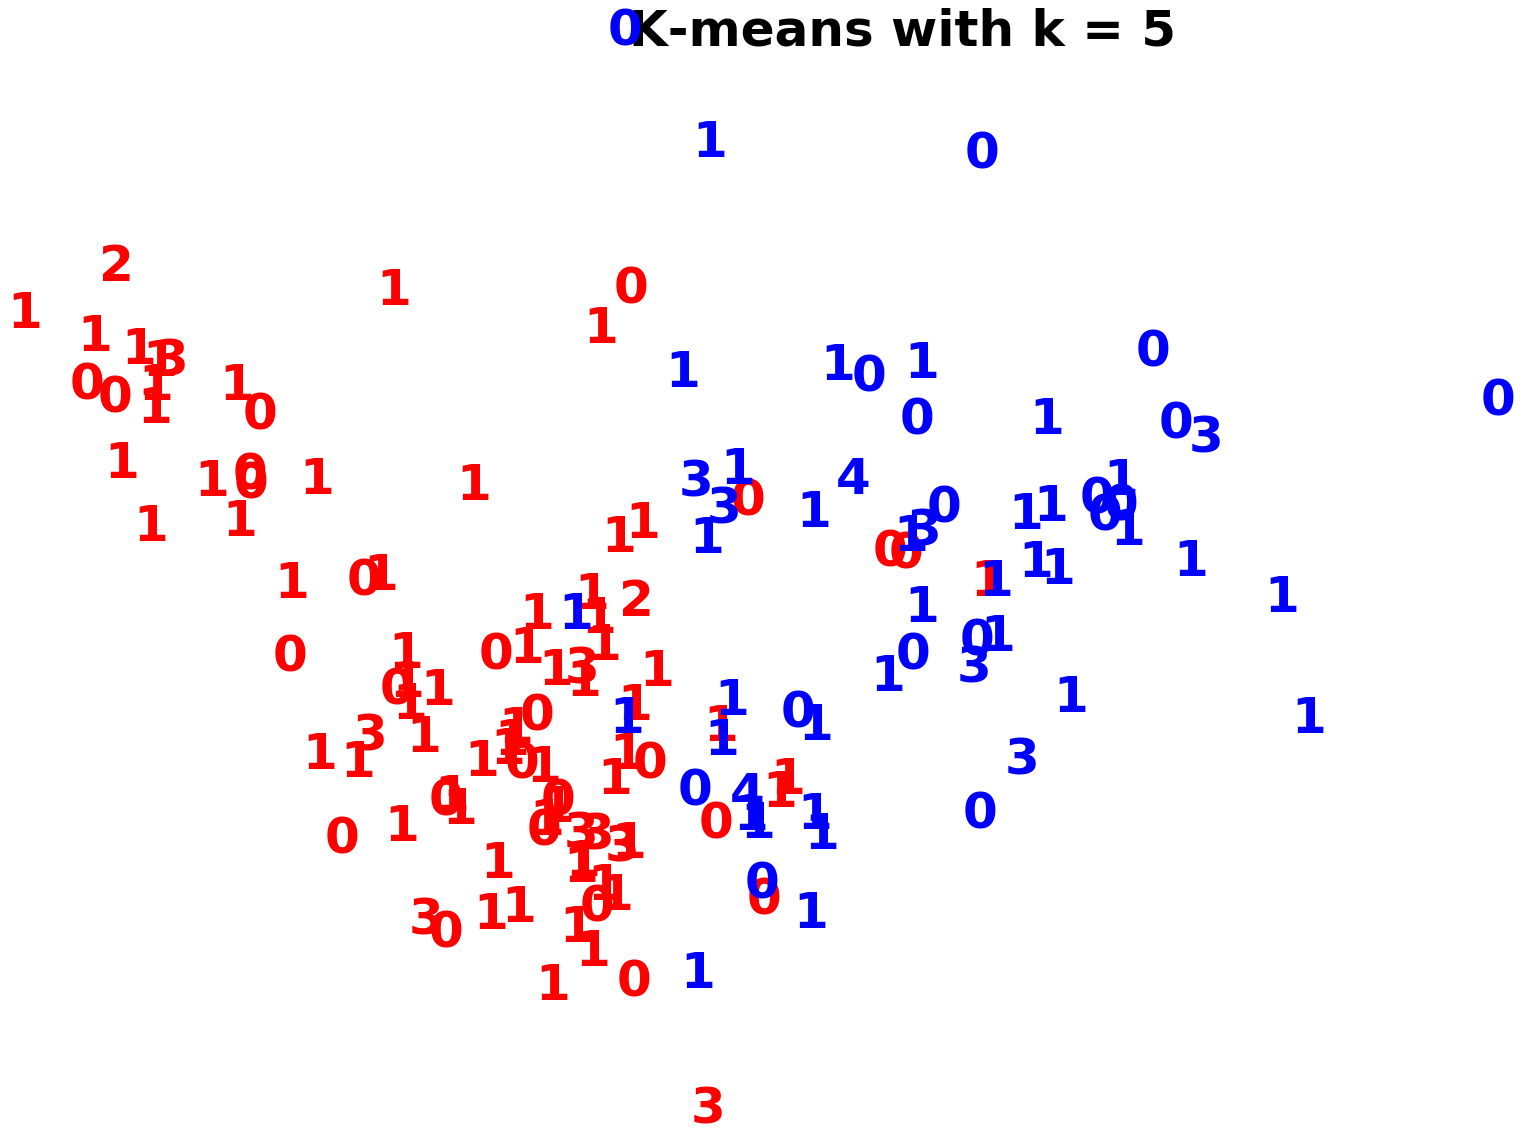

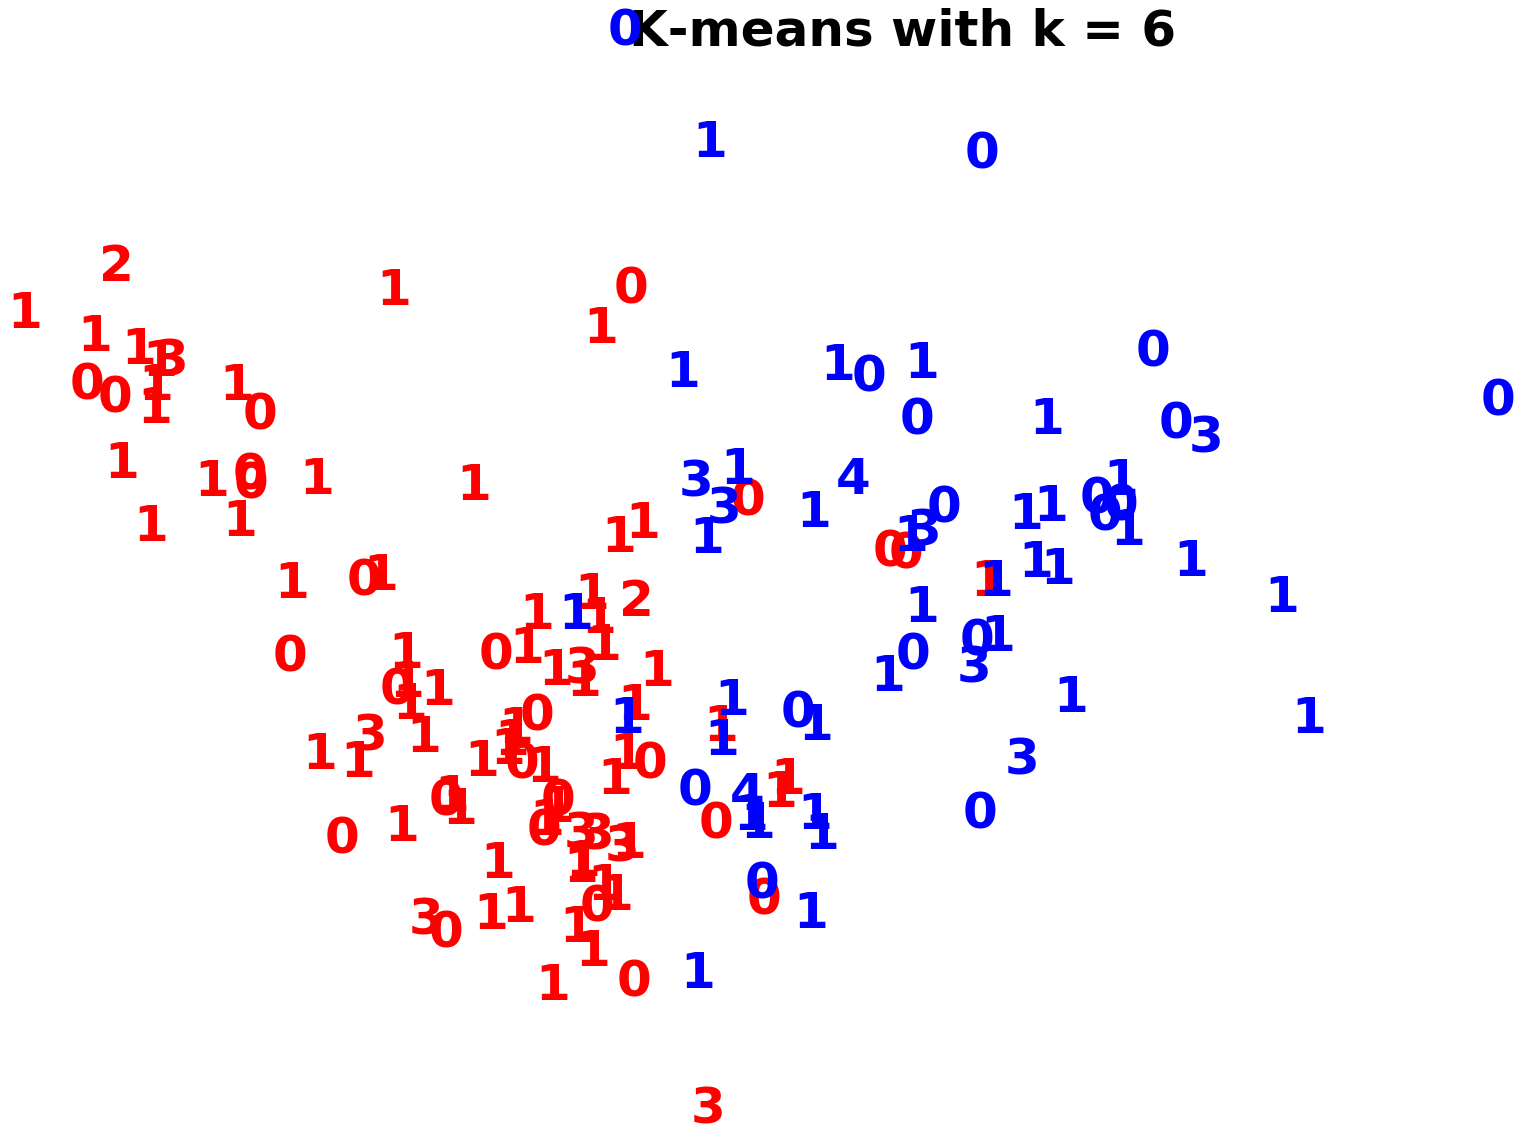

In [125]:
pca = PCA(n_components=2).fit_transform(X_std)

colours = 'rbg'
for i, solution in enumerate(kmeans_clusters):
    plt.figure(figsize=(3,3))
    plt.text(np.mean(pca[:,0]), np.max(pca[:, 1]), "K-means with k = {}".format(cluster_numbers[i]),
                 fontdict={'weight': 'bold', 'size': 50})
    for i in range(pca.shape[0]):
        plt.text(pca[i, 0], pca[i, 1], str(solution[i]),
                 color=colours[y[i]],
                 fontdict={'weight': 'bold', 'size': 50}
            )

    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()

Among the solutions, only the ones with k is equal to 2 and 3 assign a single cluster to the linearly separable class at the left most part of the figures. The others assign more than one class which we don't want for sure. So, k = 2 or k=3 is the only viable ones. However, when k=2, k-means can only assign a single cluster to the linearly non-separable classes where k=3 can assign them to two clusters. Hence, as we might expect, the best solution seems the be the one where k is equal to 3.

#### Create a k-means solution that correctly assigns patients to "heart disease diagnosis" or "no heart disease diagnosis" clusters. Note that in this case, we actually know the correct number of clusters in the data which is two. But, you'll test whether k-means will assign observations as we expect it to do. Since k-means is an unsupervised learning algorithm, it will be blind to whether or not patients have heart disease

First we load the dataset and then normalize our variables. Also, to make it easier to visualize the clusters, we reduce the data to 2 components using PCA

In [88]:
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [90]:
# Define the features and the outcome
X = df.iloc[:, 3:9]
y = df.iloc[:, 2]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='NaN', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis.
y = np.where(y > 5, 0, 1)

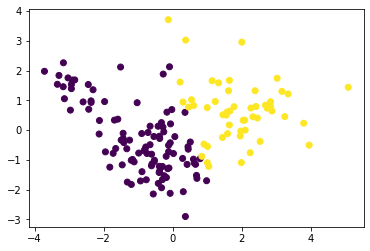

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      92  12
1       5  47


In [91]:
# Standardize the data.
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Reduce it to two components for visualization
X_pca = PCA(2).fit_transform(X_std)

# Calculate predicted values.
y_pred = KMeans(n_clusters=2, random_state=123).fit_predict(X_std)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

Looks like this model is doing ok. We're correctly classifying 139 cases out of 156.

# Evaluating Clusters

Split Data and apply K-means. Look at visualization.

In [92]:
# Data frame to store features and predicted cluster memberships.
ypred = pd.DataFrame()

# Create the two-feature PCA for graphing purposes.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Split the data into four equally-sized samples. First we break it in half:
X_half1, X_half2, X_pcahalf1, X_pcahalf2 = train_test_split(
    X_std,
    X_pca,
    test_size=0.5,
    random_state=123)

# Pass a list of tuples and a counter that increments each time we go
# through the loop. The tuples are the data to be used by k-means,
# and the PCA-derived features for graphing. We use k-means to fit a
# model to the data, then store the predicted values and the two-feature
# PCA solution in the data frame.
for counter, data in enumerate([
    (X_half1, X_pcahalf1),
    (X_half2, X_pcahalf2)]):
    
    # Put the features into ypred.
    ypred['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ypred['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
    # Generate cluster predictions and store them for clusters 2 to 4.
    for nclust in range(2, 5):
        pred = KMeans(n_clusters=nclust, random_state=123).fit_predict(data[0])
        ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred

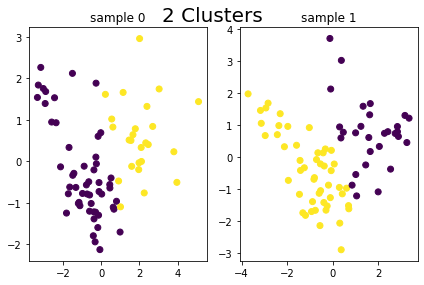

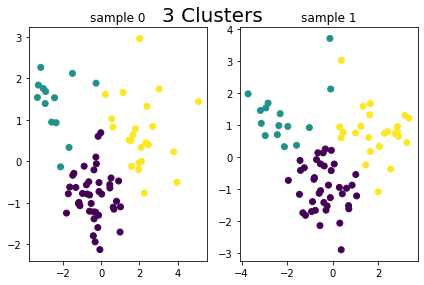

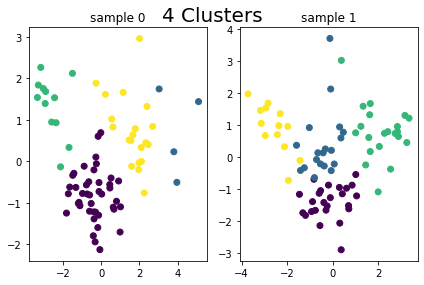

In [93]:
# For each  number of clusters, plot the clusters using the
# pca features for each sample.
for cluster in range(2, 5):
    
    # Make a grid of subplots.
    f, axarr = plt.subplots(1, 2)
    
    # Make a plot for each sample.
    for i in range(2):
        
        # PCA-created features.
        x_sub = ypred['pca_f1_sample{}'.format(i)]
        y_sub = ypred['pca_f2_sample{}'.format(i)]
        
        # Cluster assignments.
        c = ypred['clust{}_sample{}'.format(cluster, i)]
        
        # Assign the subplot to its place on the grid.
        axarr[i].scatter(x_sub, y_sub, c=c)
        axarr[i].set_title('sample {}'.format(i))
        axarr[i].set_xlim()
        axarr[i].set_ylim()
    
    # Space out the plots so that the headings don't overlap axis values.
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.tight_layout()
    plt.show()

The two cluster solution seems to be the only consistent solution among all.

In [77]:
df = df.dropna()

In [94]:

pred_2 = KMeans(n_clusters=2, random_state=123).fit_predict(X_std)
pred_3 = KMeans(n_clusters=3, random_state=123).fit_predict(X_std)
pred_4 = KMeans(n_clusters=4, random_state=123).fit_predict(X_std)

print("ARI for two cluster k-means: {}".format(
    metrics.adjusted_rand_score(y, pred_2)))
print("ARI for three cluster k-means: {}".format(
    metrics.adjusted_rand_score(y, pred_3)))
print("ARI for four cluster k-means: {}".format(
    metrics.adjusted_rand_score(y, pred_4)))

ARI for two cluster k-means: 0.6068918736653206
ARI for three cluster k-means: 0.3237755094007665
ARI for four cluster k-means: 0.21084841069337676


According to the results, the best solution is the two cluster solution as its ARI score is the highest.

## Which model is the best for cluster k-means?

In [95]:
pred_2 = KMeans(n_clusters=2, random_state=123).fit_predict(X_std)
pred_3 = KMeans(n_clusters=3, random_state=123).fit_predict(X_std)
pred_4 = KMeans(n_clusters=4, random_state=123).fit_predict(X_std)

print("Silhouette score for two cluster k-means: {}".format(
    metrics.silhouette_score(X_std, pred_2, metric='euclidean')))
print("Silhouette score for three cluster k-means: {}".format(
    metrics.silhouette_score(X_std, pred_3, metric='euclidean')))
print("Silhouette score for four cluster k-means: {}".format(
    metrics.silhouette_score(X_std, pred_4, metric='euclidean')))

Silhouette score for two cluster k-means: 0.3193697183175058
Silhouette score for three cluster k-means: 0.3435723199901948
Silhouette score for four cluster k-means: 0.2776068398676338


According to the results, the best solution is the three cluster solution as its silhouette score is the highest.

# Hierarchical Clustering

## Produce dendrograms 
Usethree different linkage methods: complete, average and ward. Which linkage method do you think produces more reasonable result?

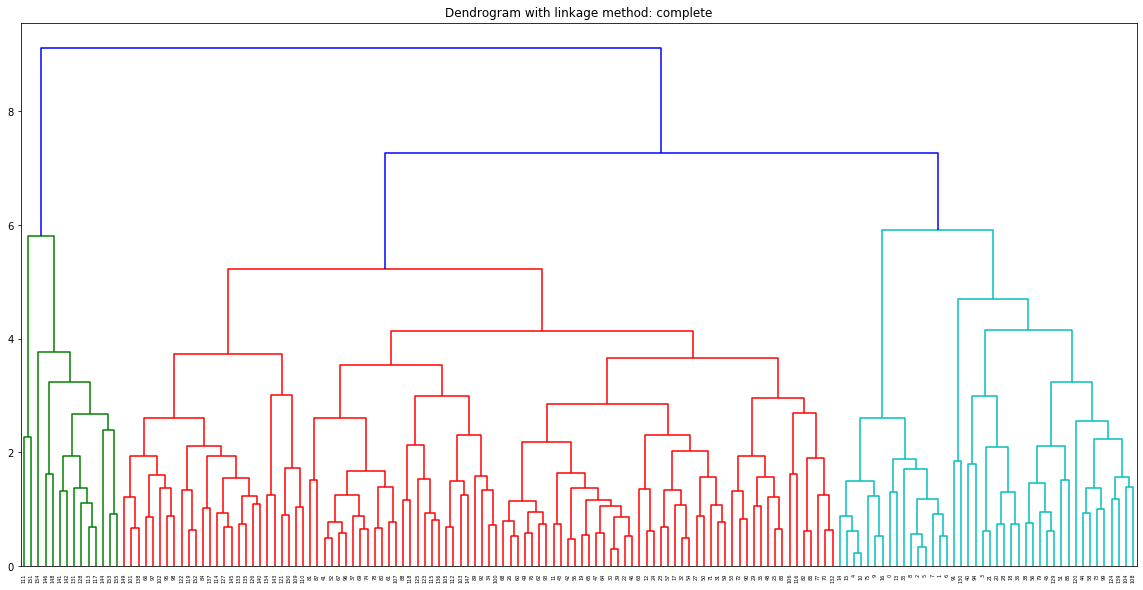

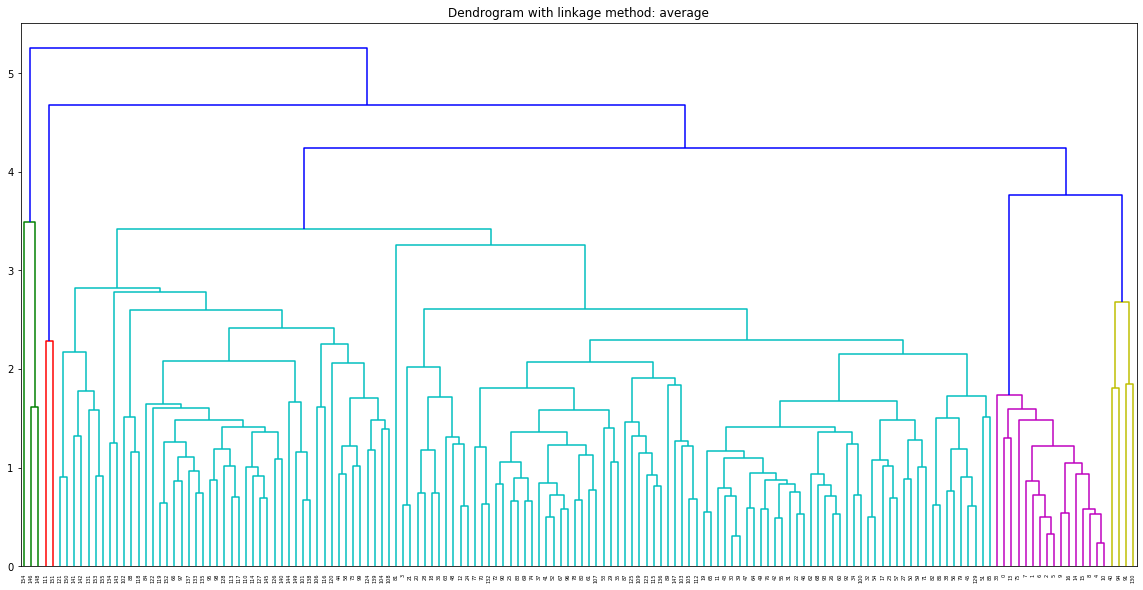

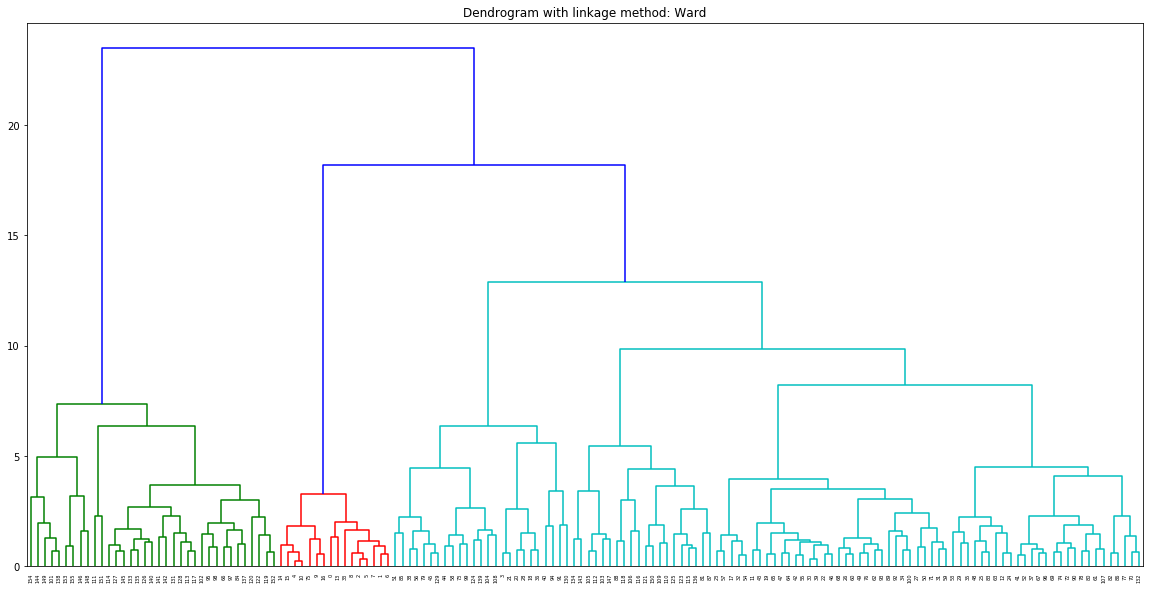

In [96]:
plt.figure(figsize=(20,10))
plt.title("Dendrogram with linkage method: complete")
dendrogram(linkage(X_std, method='complete'))
plt.show()

plt.figure(figsize=(20,10))
plt.title("Dendrogram with linkage method: average")
dendrogram(linkage(X_std, method='average'))
plt.show()

plt.figure(figsize=(20,10))
plt.title("Dendrogram with linkage method: Ward")
dendrogram(linkage(X_std, method='ward'))
plt.show()

The more reasonable result is that of the complete method's. The average and complete methods produced results that are hard to reconcile with the facts as their two cluster solutions has too few observations for one of the clusters.

## Apply agglomerative clustering setting n_clusters=2. Try the three linkage methods above and get ARI and silhouette scores for each of your solutions. Compare the results with each other and with that of the k-means solution that you implemented in the assignment of the previous checkpoint. Which algorithm and setting does perform better?

In [97]:
linkage_methods = ["ward", "average", "complete"]

# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage="average", 
                                      affinity='cosine',
                                      n_clusters=2)

# Fit model
clusters = agg_cluster.fit_predict(X_std)

print("ARI score of linkage method average: {}".format(
    metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score of linkage method average: {}".format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean')))
print("------------------------------------------------")

# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage="complete", 
                                      affinity='cosine',
                                      n_clusters=2)

# Fit model
clusters = agg_cluster.fit_predict(X_std)

print("ARI score of linkage method complete: {}".format(
    metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score of linkage method complete: {}".format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean')))
print("------------------------------------------------")

# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage="ward", 
                                      affinity='euclidean',
                                      n_clusters=2)

# Fit model
clusters = agg_cluster.fit_predict(X_std)

print("ARI score of linkage method ward: {}".format(
    metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score of linkage method ward: {}".format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean')))

ARI score of linkage method average: 0.6286277109912435
Silhouette score of linkage method average: 0.2795260765948865
------------------------------------------------
ARI score of linkage method complete: 0.19508163976179524
Silhouette score of linkage method complete: 0.2090474335915726
------------------------------------------------
ARI score of linkage method ward: 0.364554917162379
Silhouette score of linkage method ward: 0.31149874729021104


According to the results, the best scores are achieved by the linkage methode average. The ARI and silhouette scores of the two cluster k-means solution was 0.61 and 0.32 respectively. So, in terms of ARI the best model seems to be agglomerative clustering, however in terms of silhouette score the best one is k-means.

# DBSCAN

## Apply DBSCAN by trying different values for eps and min_samples parameters.

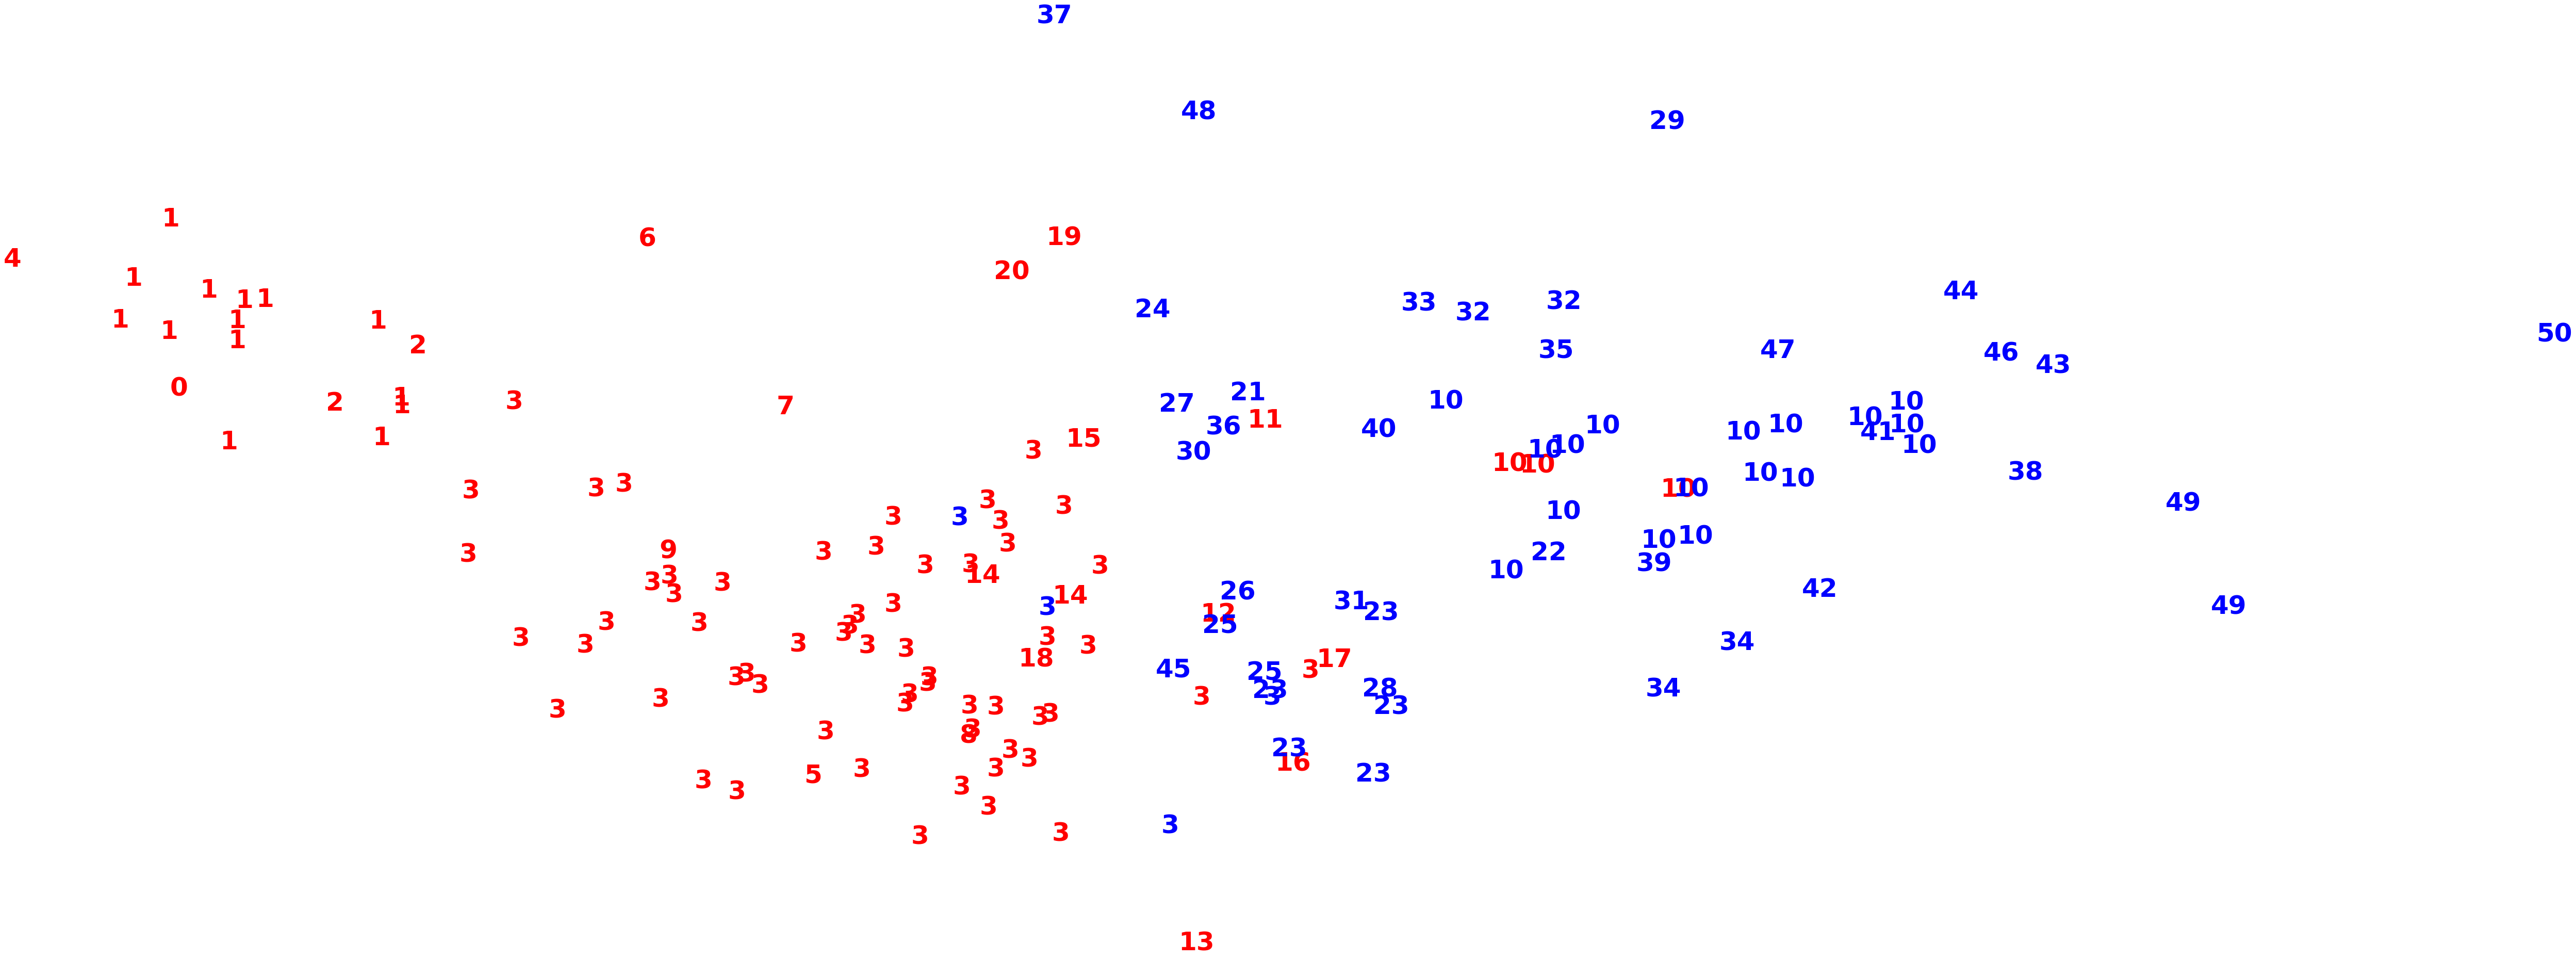

In [99]:
dbscan_cluster = DBSCAN(eps=1, min_samples=1, metric="euclidean")

# Fit model
clusters = dbscan_cluster.fit_predict(X_std)

pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbgrg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

Apply DBSCAN by setting parameters eps=1, min_samples=1, metric="euclidean". Then, increase the value of min_samples. What's the effect of increasing min_samples on the number of clusters DBSCAN identifies?

In [100]:
dbscan_cluster = DBSCAN(eps=1, min_samples=1, metric="euclidean")

# Fit model
clusters = dbscan_cluster.fit_predict(X_std)

print("Number of clusters when min_samples=1 is: {}".format(len(np.unique(clusters))))

min_samples_list = range(2,51)

for i in range(2,51):
    dbscan_cluster = DBSCAN(eps=1, min_samples=i, metric="euclidean")
    # Fit model
    clusters = dbscan_cluster.fit_predict(X_std)
    print("Number of clusters when min_samples={} is: {}".format(i, len(np.unique(clusters))))

Number of clusters when min_samples=1 is: 51
Number of clusters when min_samples=2 is: 11
Number of clusters when min_samples=3 is: 5
Number of clusters when min_samples=4 is: 5
Number of clusters when min_samples=5 is: 7
Number of clusters when min_samples=6 is: 4
Number of clusters when min_samples=7 is: 4
Number of clusters when min_samples=8 is: 4
Number of clusters when min_samples=9 is: 4
Number of clusters when min_samples=10 is: 4
Number of clusters when min_samples=11 is: 2
Number of clusters when min_samples=12 is: 2
Number of clusters when min_samples=13 is: 2
Number of clusters when min_samples=14 is: 2
Number of clusters when min_samples=15 is: 2
Number of clusters when min_samples=16 is: 2
Number of clusters when min_samples=17 is: 2
Number of clusters when min_samples=18 is: 1
Number of clusters when min_samples=19 is: 1
Number of clusters when min_samples=20 is: 1
Number of clusters when min_samples=21 is: 1
Number of clusters when min_samples=22 is: 1
Number of cluster

Number of clusters seems to decrease with as epsilon increases.

Apply DBSCAN by setting parameters eps=1, min_samples=1, metric="euclidean". Then, increase the value of eps. What's the effect of increasing eps on the number of clusters DBSCAN identifies?

In [101]:
dbscan_cluster = DBSCAN(eps=1, min_samples=1, metric="euclidean")

# Fit model
clusters = dbscan_cluster.fit_predict(X_std)

print("Number of clusters when eps=1 is: {}".format(len(np.unique(clusters))))

min_samples_list = range(2,51)

for i in [0.01,0.1,1,2,3,4,5,6,7,8,9,10]:
    dbscan_cluster = DBSCAN(eps=i, min_samples=1, metric="euclidean")
    # Fit model
    clusters = dbscan_cluster.fit_predict(X_std)
    print("Number of clusters when eps={} is: {}".format(i, len(np.unique(clusters))))

Number of clusters when eps=1 is: 51
Number of clusters when eps=0.01 is: 156
Number of clusters when eps=0.1 is: 156
Number of clusters when eps=1 is: 51
Number of clusters when eps=2 is: 3
Number of clusters when eps=3 is: 1
Number of clusters when eps=4 is: 1
Number of clusters when eps=5 is: 1
Number of clusters when eps=6 is: 1
Number of clusters when eps=7 is: 1
Number of clusters when eps=8 is: 1
Number of clusters when eps=9 is: 1
Number of clusters when eps=10 is: 1


Number of clusters seems to decrease with as min_samples increases.

# GMM

## Apply GMM by setting n_components=2. 
Get ARI and silhoutte scores for your solution and compare it with those of the k-means and hierarchical clustering solutions that you implemented in the assignments of the previous checkpoints. Which algorithm does perform better

In [102]:
# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=2, random_state=123)

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

print("ARI score: {}".format(
    metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score: {}".format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean')))

ARI score: 0.005717072146867061
Silhouette score: 0.2613757518769948


GMM scores lower than both k-means and hierarchical clustering in terms of ARI and silhouette scores.

## GMM implementation

* full: This is the default. Each component has its own general covariance matrix.
* tied: All components share the same general covariance matrix.
* diag: Each component has its own diagonal covariance matrix.
* spherical: Each component has its own single variance.

Try all of these. Which one does perform better in terms of ARI and silhouette scores?

In [103]:
# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=2, random_state=123, covariance_type="full")

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

print("ARI score with covariance_type=full: {}".format(
    metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score with covariance_type=full: {}".format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean')))
print("------------------------------------------------------")

# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=2, random_state=123, covariance_type="tied")

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

print("ARI score with covariance_type=tied: {}".format(
    metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score with covariance_type=tied: {}".format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean')))
print("------------------------------------------------------")

# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=2, random_state=123, covariance_type="diag")

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

print("ARI score with covariance_type=diag: {}".format(
    metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score with covariance_type=diag: {}".format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean')))
print("------------------------------------------------------")


# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=2, random_state=123, covariance_type="spherical")

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

print("ARI score with covariance_type=spherical: {}".format(
    metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score with covariance_type=spherical: {}".format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean')))
print("------------------------------------------------------")

ARI score with covariance_type=full: 0.005717072146867061
Silhouette score with covariance_type=full: 0.2613757518769948
------------------------------------------------------
ARI score with covariance_type=tied: -0.037518791645791846
Silhouette score with covariance_type=tied: 0.3369322071152699
------------------------------------------------------
ARI score with covariance_type=diag: 0.6705932736992105
Silhouette score with covariance_type=diag: 0.2910656261119266
------------------------------------------------------
ARI score with covariance_type=spherical: -0.03982692097234702
Silhouette score with covariance_type=spherical: 0.33155881417937877
------------------------------------------------------


ARI score of covariance type diagonal is higher than the others and its silhouette score is average with the others. The scores of the other covariance types are roughly the same.

# PCA

## Apply PCA to the data and get the first two principal components.

In [105]:
# We just want the first two principal components
pca = PCA(n_components=2)

# We get the components by 
# calling fit_transform method with our data
pca_components = pca.fit_transform(X)

## Using the first two principal components, draw a graph of the data by coloring and labeling the data points.

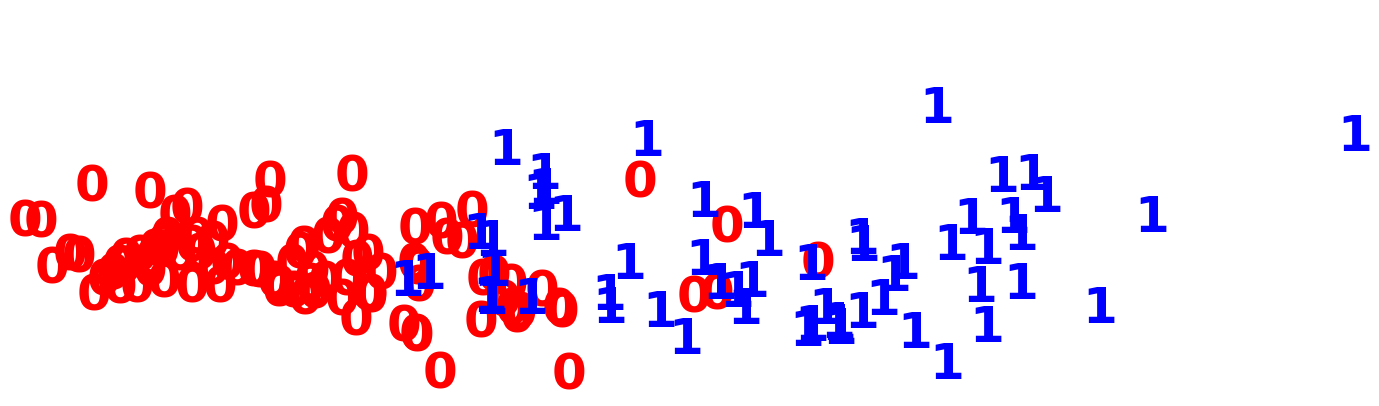

In [106]:
plt.figure(figsize=(10,5))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(pca_components.shape[0]):
    plt.text(pca_components[i, 0], pca_components[i, 1], str(y[i]),
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

## Do you think PCA solution is satisfactory? Can you distinguish between different classes easily?

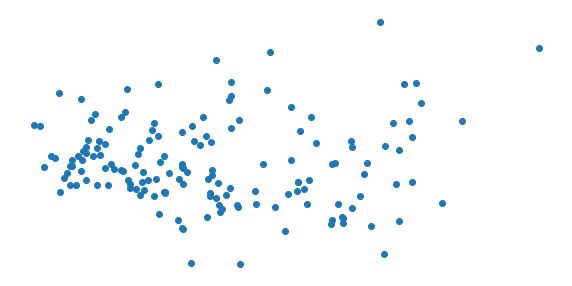

In [107]:
plt.figure(figsize=(10,5))
plt.scatter(pca_components[:, 0], pca_components[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

Unfortunately the graph above doesn't enable us to infer the classes through visualization. As can be seen in the colored and labeled graph, PCA can gather together the observations of the same classes to some degree. However, observations from all of the classes intertwined each other and can't be distinguished without coloring or labeling. In this respect, PCA solution is not satisfactory.

# t-SNE

## Apply t-SNE to the data by setting n_components=2

In [108]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 156 samples in 0.000s...
[t-SNE] Computed neighbors for 156 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 156 / 156
[t-SNE] Mean sigma: 0.247830
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.010181
[t-SNE] KL divergence after 300 iterations: 0.251347


## Using the two-dimensional t-SNE representation, draw a graph of the data by coloring and labeling the data points.

In [109]:
plt.figure(figsize=(10,5))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(tsne_results.shape[0]):
    plt.text(tsne_results[i, 0], tsne_results[i, 1], str(y[i]),
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

## Do you think t-SNE solution is satisfactory? Can you distinguish between different classes easily? Which one has done a better job: t-SNE or the PCA?

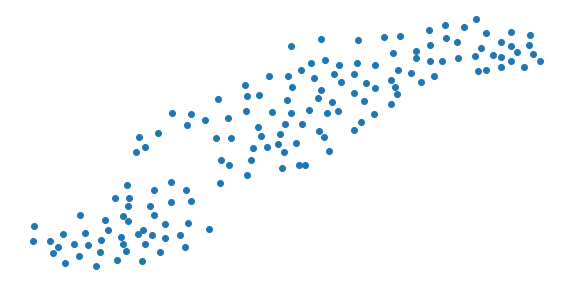

In [110]:
plt.figure(figsize=(10,5))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

By using t-SNE, we can't really distinguish classes clearly but in this respect t-SNE solution is better than that of PCA's.

## Now, play with the different perplexity values and apply t-SNE for each of them. Which perplexity value is the best one in terms of the two-dimensional representation clarity?

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 156 samples in 0.000s...
[t-SNE] Computed neighbors for 156 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 156 / 156
[t-SNE] Mean sigma: 0.133311
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.199203
[t-SNE] KL divergence after 300 iterations: 0.624784


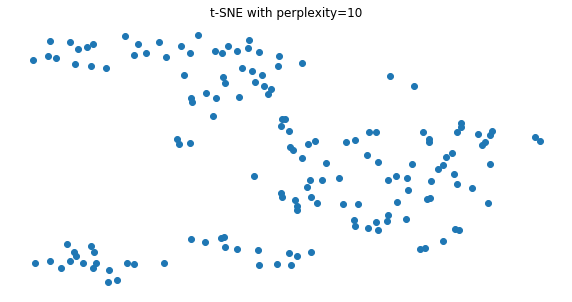

In [111]:
tsne = TSNE(n_components=2, verbose=1, perplexity=10, n_iter=300)
tsne_results = tsne.fit_transform(X)

plt.figure(figsize=(10,5))
plt.title("t-SNE with perplexity=10")
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 156 samples in 0.001s...
[t-SNE] Computed neighbors for 156 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 156 / 156
[t-SNE] Mean sigma: 0.178418
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.525520
[t-SNE] KL divergence after 300 iterations: 0.398957


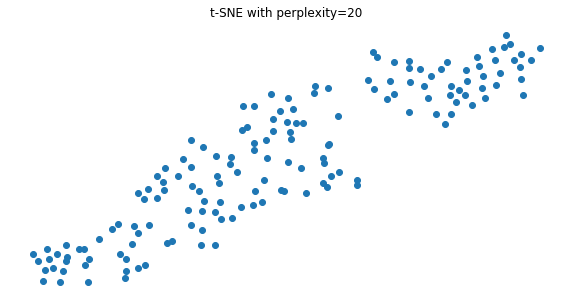

In [112]:
tsne = TSNE(n_components=2, verbose=1, perplexity=20, n_iter=300)
tsne_results = tsne.fit_transform(X)

plt.figure(figsize=(10,5))
plt.title("t-SNE with perplexity=20")
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 156 samples in 0.000s...
[t-SNE] Computed neighbors for 156 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 156 / 156
[t-SNE] Mean sigma: 0.214109
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.575951
[t-SNE] KL divergence after 300 iterations: 0.347462


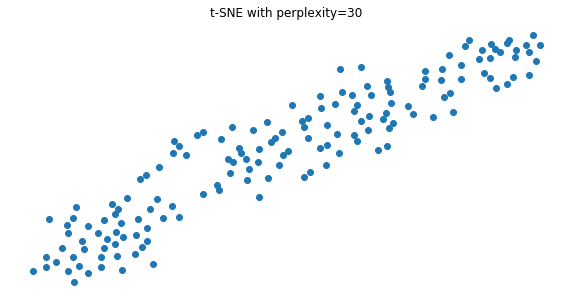

In [113]:
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(X)

plt.figure(figsize=(10,5))
plt.title("t-SNE with perplexity=30")
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 156 samples in 0.000s...
[t-SNE] Computed neighbors for 156 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 156 / 156
[t-SNE] Mean sigma: 0.281848
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.381611
[t-SNE] KL divergence after 300 iterations: 0.225220


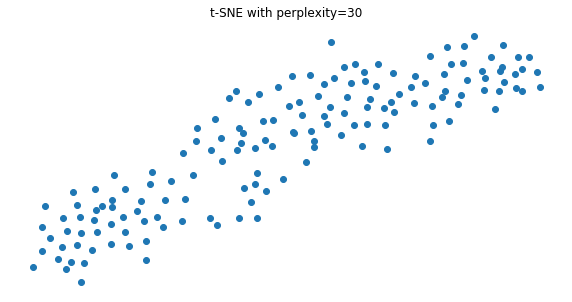

In [114]:
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=300)
tsne_results = tsne.fit_transform(X)

plt.figure(figsize=(10,5))
plt.title("t-SNE with perplexity=30")
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

[t-SNE] Computing 155 nearest neighbors...
[t-SNE] Indexed 156 samples in 0.000s...
[t-SNE] Computed neighbors for 156 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 156 / 156
[t-SNE] Mean sigma: 0.317702
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.110687
[t-SNE] KL divergence after 300 iterations: 0.153282


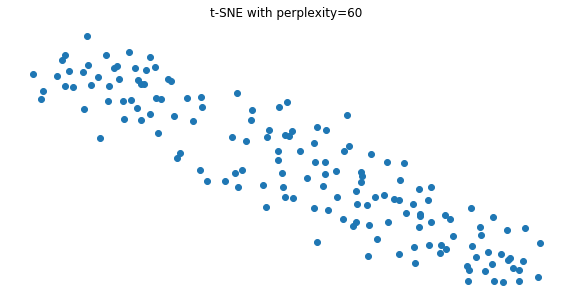

In [115]:
tsne = TSNE(n_components=2, verbose=1, perplexity=60, n_iter=300)
tsne_results = tsne.fit_transform(X)

plt.figure(figsize=(10,5))
plt.title("t-SNE with perplexity=60")
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

All the different configurations of perplexity achieves better results than PCA, however choosing one of them isn't that much easy by just looking at unlabeled and uncolored graphs.

# UMAP

## Apply UMAP to the data

In [116]:
umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X)

## Using the two-dimensional UMAP representation, draw a graph of the data by coloring and labeling the data points.

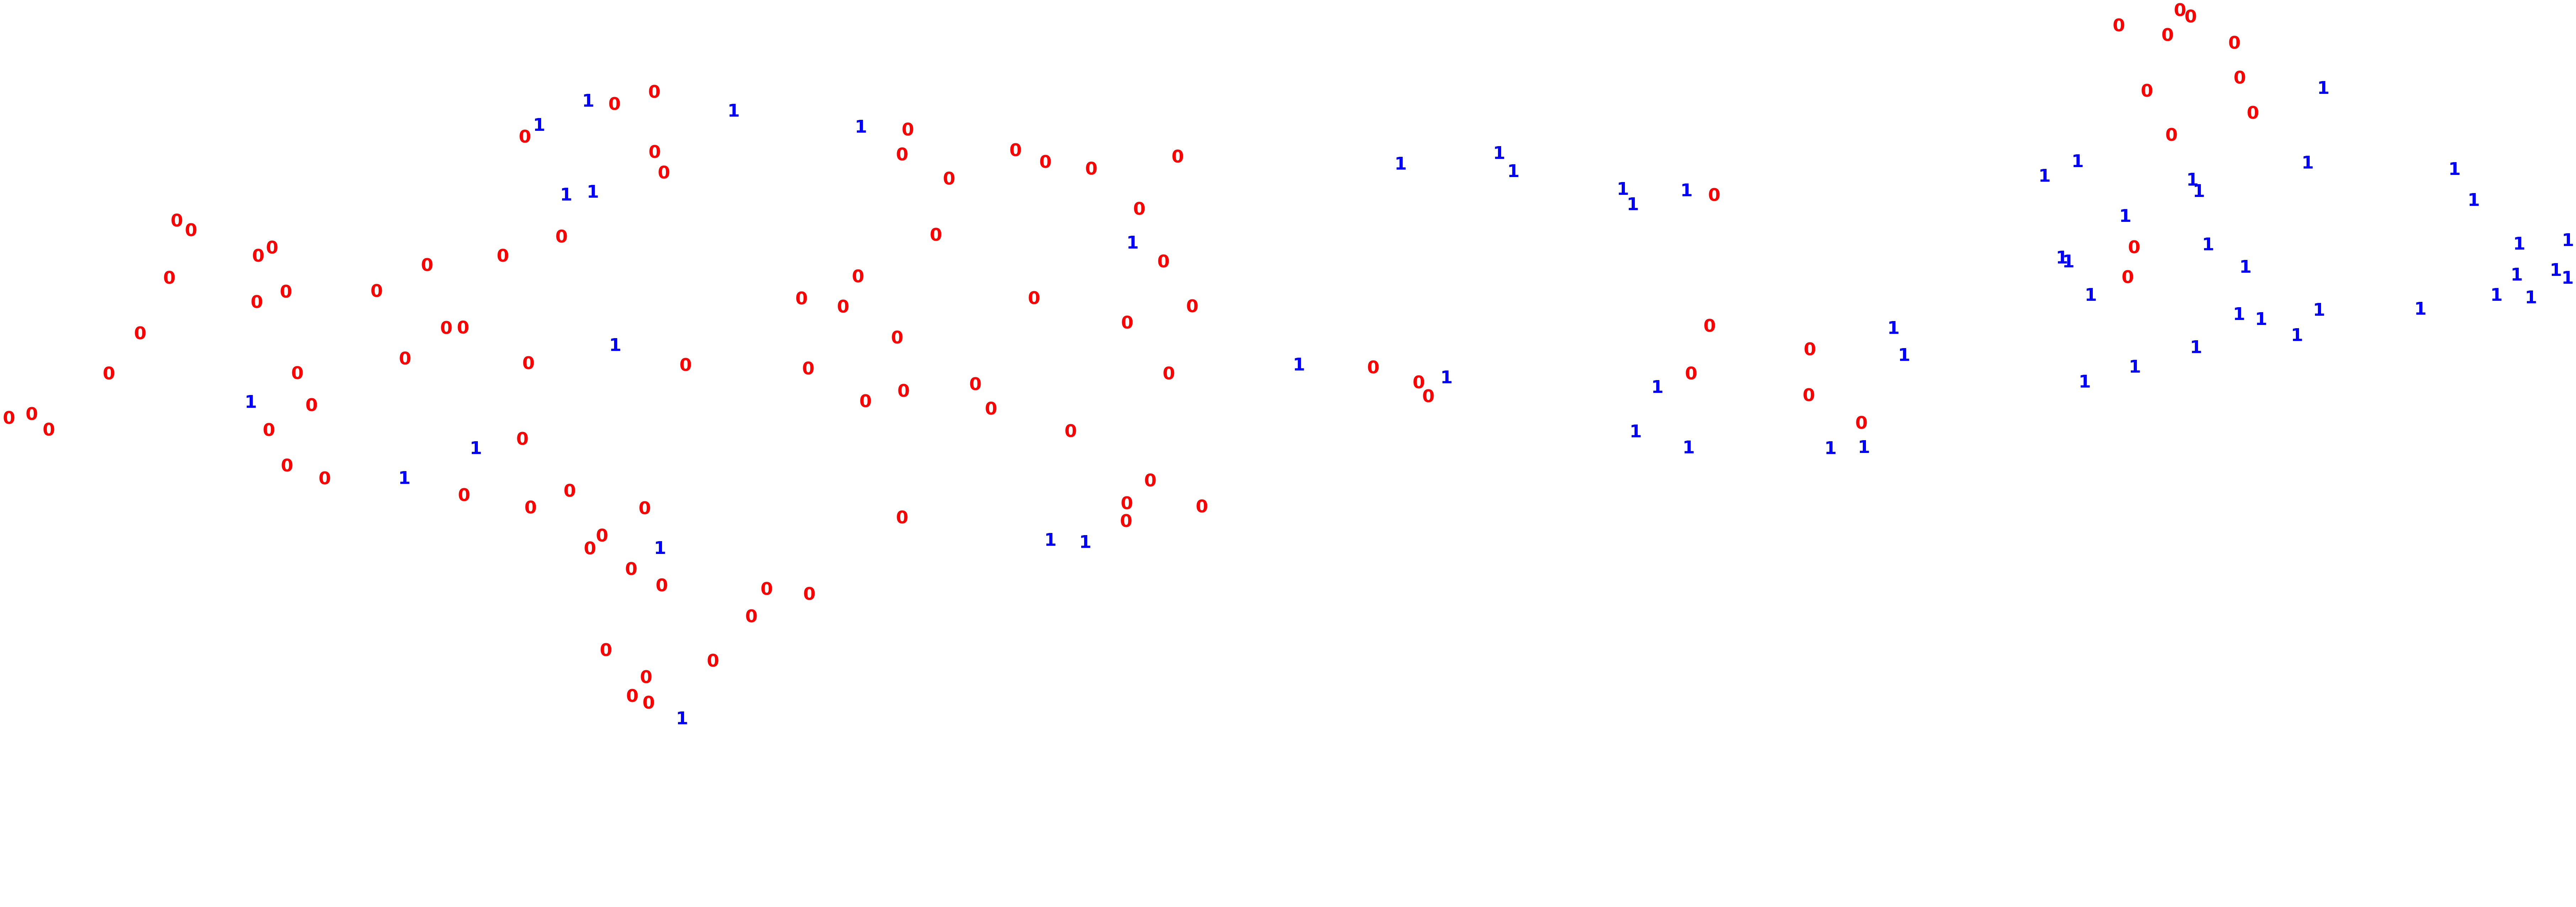

In [117]:
plt.figure(figsize=(10,5))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(umap_results.shape[0]):
    plt.text(umap_results[i, 0], umap_results[i, 1], y[i],
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

## Do you think UMAP solution is satisfactory? Can you distinguish between different classes easily? Which one has done a better job: UMAP or the others (t-SNE or PCA) ?

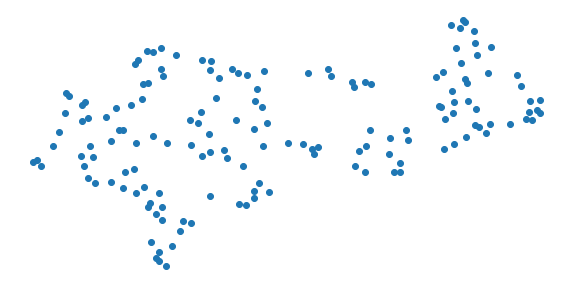

In [118]:
plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

UMAP's solution aren't much better than those of PCA's. t-SNE's aren't separated any more clearly than PCA.

## Now, play with the different hyperparameter values of the UMAP and apply UMAP for each of them. Which combination is the best in terms of the two-dimensional representation clarity? 

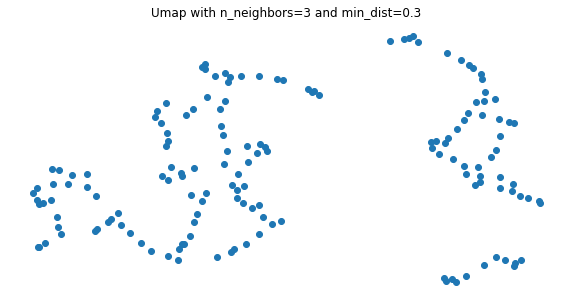

In [119]:
umap_results = umap.UMAP(n_neighbors=3,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X)

plt.figure(figsize=(10,5))
plt.title("Umap with n_neighbors=3 and min_dist=0.3")
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

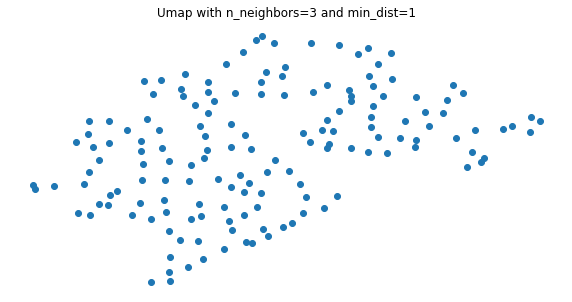

In [120]:
umap_results = umap.UMAP(n_neighbors=3,
                      min_dist=1,
                      metric='correlation').fit_transform(X)

plt.figure(figsize=(10,5))
plt.title("Umap with n_neighbors=3 and min_dist=1")
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

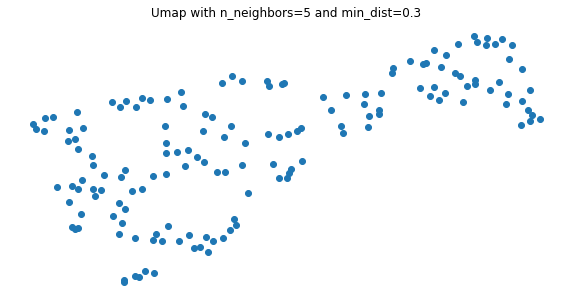

In [121]:
umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X)

plt.figure(figsize=(10,5))
plt.title("Umap with n_neighbors=5 and min_dist=0.3")
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

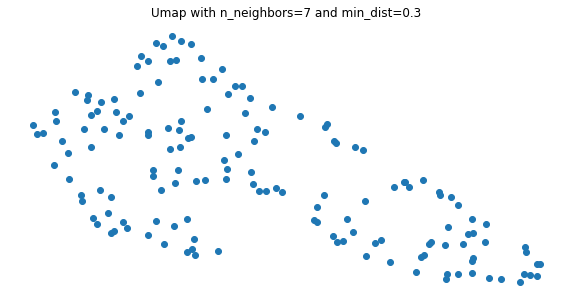

In [122]:
umap_results = umap.UMAP(n_neighbors=7,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X)

plt.figure(figsize=(10,5))
plt.title("Umap with n_neighbors=7 and min_dist=0.3")
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

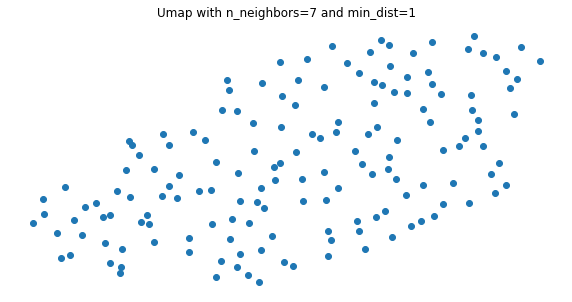

In [123]:
umap_results = umap.UMAP(n_neighbors=7,
                      min_dist=1,
                      metric='correlation').fit_transform(X)

plt.figure(figsize=(10,5))
plt.title("Umap with n_neighbors=7 and min_dist=1")
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

It seems that the most clear solutions are achieved with n_neighbors=3,min_dist=0.3.